In [ ]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualize OABF Dataset (Astro)
In this notebook we're going to load the "Astro" of the OABF dataset. The dataset comprises 3 versions of the same footage:
1. *Raw* measurements
2. *Motion corrected* processed
3. *Cleaned* version obtained using DeepCad

In [ ]:
mot_cor = Recording(DATASETS["oabf_astro"] / "x.tiff")
deepcad = Recording(DATASETS["oabf_astro"] / "y.tiff")

### Overview of the extracted samples

Frame: 0


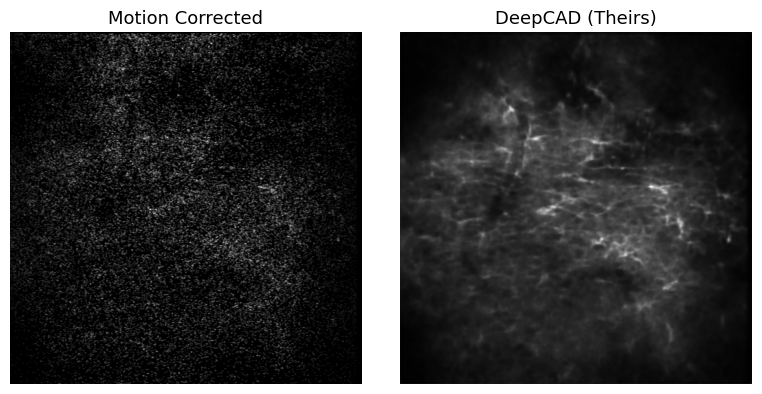

Frame: -1


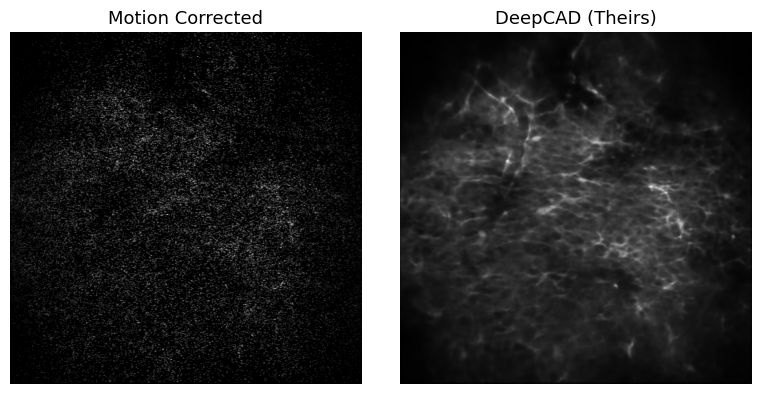

In [17]:
for i in [0, -1]:
    cprint("Frame:", i)
    imshow({"Motion Corrected": mot_cor[i], "DeepCAD (Theirs)": deepcad[i]}, size=4, cmap="grey")

## Visualize values distribution

The values distribution is exponential

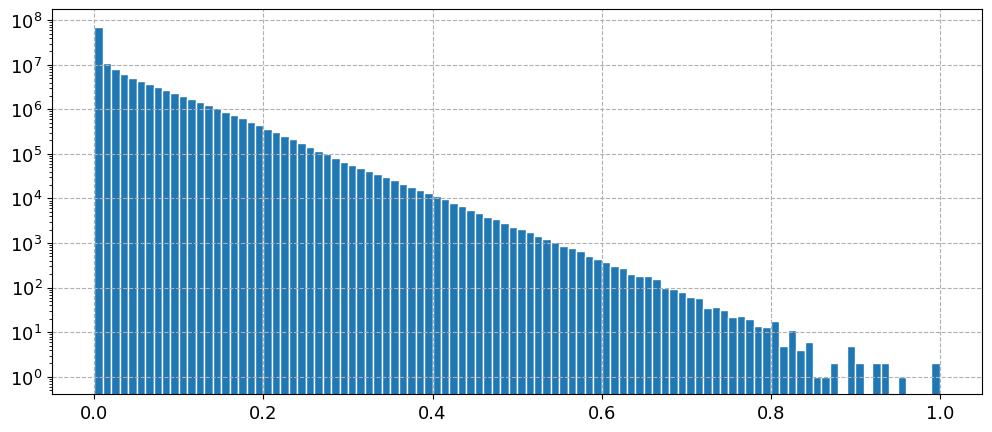

In [23]:
mot_cor[:500].hist()

## Export motion corrected slice as video

In [21]:
mot_cor[:250].render("astro_motion_corrected.mp4")

In [22]:
deepcad[:250].render("astro_deepcad_theirs.mp4")